In [1]:
import csv
from scipy.optimize import curve_fit
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
data = pd.read_csv('rezultati.csv')

print(data)

M = data['M'] # v mN

M    Ih     I
0  1.0  2890  1421
1  1.2  2889  1841
2  1.4  2888  2147
3  1.6  2888  2459
4  1.8  2888  2774
5  2.0  2890  3107


In [7]:
def fit_func(x, a, b):
    return x*a+b

N = 3
Nh = 154
Rh = 0.2
r = 0.1216/2

S = math.pi*r**2

x = [(4/5)**(3/2) *N*Nh*S/Rh *row['I']*row['Ih']*10**-6 for index,row in data.iterrows()]
# pretvorba v Nm (Newton metre)
y = [y * 10 **-4 for y in M]
print(x,y)

[78.83079607203665, 102.09519946666092, 119.02363922120293, 136.32004138096787, 153.7827550999613, 172.36262026447423] [0.0001, 0.00012, 0.00014, 0.00016, 0.00018, 0.0002]


In [18]:
params = curve_fit(
    fit_func, x, y)
a = params[0][0]
b = params[0][1]

# CALCULATE ERRORS FROM MATRIX
errs = np.sqrt(np.diag(params[1]))
print('a =', a,'Vs/Am','+-',errs[0],'Vs/Am', '\nb =', b,'+-',errs[1])

a = 1.0910526651715531e-06 Vs/Am +- 2.6967656531378417e-08 Vs/Am 
b = 1.1360837681371903e-05 +- 3.528978470586314e-06


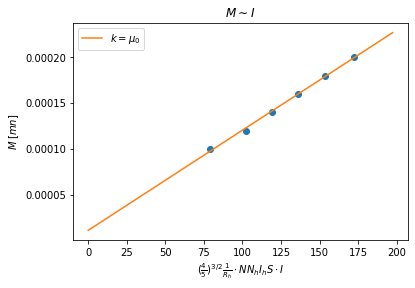

In [21]:
x_fit = np.linspace(0, x[-1]+25, 100)

y_fit = fit_func(x_fit, a, b)

plt.plot(x, y, 'o')
plt.plot(x_fit, y_fit, label=r'$k = \mu_0$')

plt.title(r'$M \sim I$')
plt.ylabel(r'$M \; [mn]$')
plt.xlabel(r'$(\frac{4}{5})^{3/2} \frac{1}{R_h}\cdot N N_h I_h S \cdot I$')

#plt.grid(True)

plt.legend()
plt.show()

Naklon grafa ($= \mu_0$), je:
$$ \mu_0 = (1.091 \pm 0.027) \cdot 10^{-6} \frac{Vs}{Am} $$

V literaturi predpisana vrednost je:
$$ \mu_0 = 4\pi \cdot 10^{-7} \frac{Vs}{Am} $$


In [31]:
razlika = abs(a - 4*math.pi *10**-7)
napaka = razlika / a
print(napaka)

0.15176572272826838


Naš rezultat se od literature razlikuje za 15%, kar je precej blizu dejanski vrednosti $\mu_0$.